<a href="https://colab.research.google.com/github/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/blob/main/Code_Notebooks/Classification/07_Classification_K_medoids_Sunny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/Optimal_Clusters_datasets/labeled_clusters_KMeans_k_2_sel.csv

--2025-04-14 15:21:52--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/Optimal_Clusters_datasets/labeled_clusters_KMeans_k_2_sel.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4497 (4.4K) [text/plain]
Saving to: ‘labeled_clusters_KMeans_k_2_sel.csv’

labeled_clusters_KM 100%[===================>]   4.39K  --.-KB/s    in 0s      

2025-04-14 15:21:52 (44.2 MB/s) - ‘labeled_clusters_KMeans_k_2_sel.csv’ saved [4497/4497]



In [2]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_one_hot_encoded.csv

--2025-04-14 15:21:53--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_one_hot_encoded.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13442 (13K) [text/plain]
Saving to: ‘3_one_hot_encoded.csv’

3_one_hot_encoded.c 100%[===================>]  13.13K  --.-KB/s    in 0s      

2025-04-14 15:21:53 (64.3 MB/s) - ‘3_one_hot_encoded.csv’ saved [13442/13442]



In [3]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/Optimal_Clusters_datasets/labeled_clusters_KMedoids_k_2_sel.csv

--2025-04-14 15:21:54--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/Optimal_Clusters_datasets/labeled_clusters_KMedoids_k_2_sel.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4499 (4.4K) [text/plain]
Saving to: ‘labeled_clusters_KMedoids_k_2_sel.csv’

labeled_clusters_KM 100%[===================>]   4.39K  --.-KB/s    in 0s      

2025-04-14 15:21:54 (45.7 MB/s) - ‘labeled_clusters_KMedoids_k_2_sel.csv’ saved [4499/4499]



In [4]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.model_selection import ParameterGrid

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

# Data
This dataset contains the classes obtained upon binary clustering of selected parameters from previous steps

In [5]:
data=pd.read_csv('labeled_clusters_KMeans_k_2_sel.csv')

In [6]:
data

,Prod_Label_KMeans_k=2_sel,Sugars (Su),Weight of 300 Seeds (W3S),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Percentage (PPE),Protein Content (PCO),Number of Pods (NP)
0,0,0.433,33.6,5567.4,1.86,33.2,0.82,130.3
1,0,0.334,34.4,2245.5,1.87,38.5,0.13,132.0
2,0,0.490,35.2,4326.7,2.04,33.6,0.15,150.0
3,1,0.163,52.3,6214.5,2.20,33.5,0.14,140.8
4,0,0.795,31.2,3897.8,1.88,39.6,0.60,175.6
...,...,...,...,...,...,...,...,...
103,0,0.663,31.2,4472.7,2.60,39.7,0.32,209.0
104,1,0.165,34.5,5643.7,2.60,33.6,0.36,160.0
105,0,1.115,37.2,3067.1,1.80,37.2,1.15,148.3
106,0,0.295,35.3,3112.2,2.10,32.3,0.17,156.0


In [7]:
data_original=pd.read_csv('3_one_hot_encoded.csv')

In [8]:
data_original

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),...,Number of Seeds per Pod (NSP),Protein Content (PCO),C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,C1S1G5,R1,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,...,1.86,0.82,False,False,False,False,False,False,True,False
1,C2S3G4,R1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,...,1.87,0.13,True,False,True,False,False,True,False,False
2,C2S1G6,R1,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,...,2.04,0.15,True,False,False,False,False,False,False,True
3,C1S1G1,R1,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,...,2.20,0.14,False,False,False,False,False,False,False,False
4,C1S2G6,R2,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,...,1.88,0.60,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,C1S2G3,R3,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,...,2.60,0.32,False,True,False,False,True,False,False,False
104,C1S3G2,R2,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,...,2.60,0.36,False,False,True,True,False,False,False,False
105,C2S1G5,R2,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,...,1.80,1.15,True,False,False,False,False,False,True,False
106,C2S2G4,R1,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,...,2.10,0.17,True,True,False,False,False,True,False,False


# **Random Forest Algorithm**

**Kmediod clusters(2)**

*using only input parameters for kmediod clusters (2) (random forest)*

In [84]:
data=pd.read_csv('3_one_hot_encoded.csv')
data_sub = data_original.iloc[:, 2:]
bool_cols = data_sub.select_dtypes(include='bool').columns
data_original[bool_cols] = data_original[bool_cols].astype(int)

data_X=pd.DataFrame(data_original.iloc[:,-8:])
#data_X

In [85]:
data_Y=pd.read_csv('labeled_clusters_KMedoids_k_2_sel.csv')
data_Y=pd.DataFrame(data_Y['Prod_Label_KMedoids_k=2_sel'])
#data_Y

In [86]:
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)

Training Random Forest with GridSearchCV...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Test Set Performance:
Accuracy       : 0.7273
Precision      : 0.7597
Recall         : 0.7273
F1 Score       : 0.7377
Confusion Matrix:
 [[ 4  2]
 [ 4 12]]

Cross-Validated Performance (on Training Set):
CV Accuracy  : 0.6117
CV Precision : 0.6106
CV Recall    : 0.6117
CV F1 Score  : 0.6069


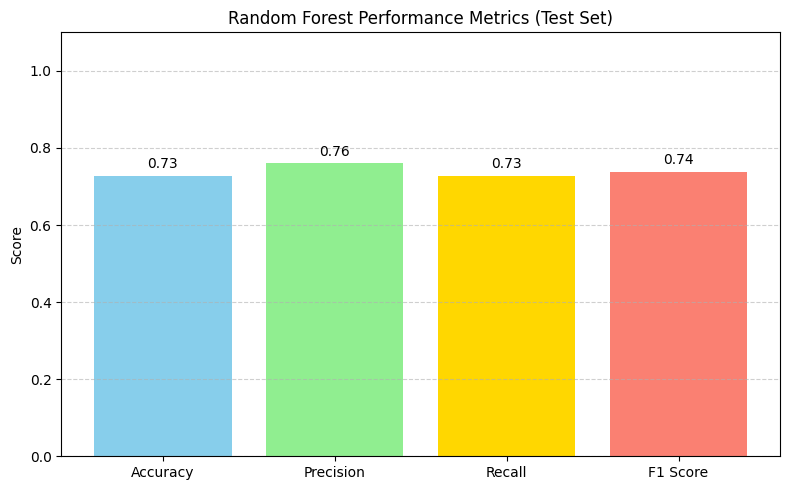

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 110, 120, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Train model
print("Training Random Forest with GridSearchCV...")
grid.fit(data_X_train, data_Y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict on test set
y_pred = best_model.predict(data_X_test)

# Test set metrics
acc = accuracy_score(data_Y_test, y_pred)
prec = precision_score(data_Y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(data_Y_test, y_pred, average='weighted')
f1 = f1_score(data_Y_test, y_pred, average='weighted')
cm = confusion_matrix(data_Y_test, y_pred)

print(f"\nTest Set Performance:")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print("Confusion Matrix:\n", cm)

# Cross-validated performance on training set
cv_results = cross_validate(
    best_model,
    data_X,
    data_Y,
    cv=5,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
)

# Mean scores from CV
acc_cv = np.mean(cv_results['test_accuracy'])
prec_cv = np.mean(cv_results['test_precision_weighted'])
rec_cv = np.mean(cv_results['test_recall_weighted'])
f1_cv = np.mean(cv_results['test_f1_weighted'])

print("\nCross-Validated Performance (on Training Set):")
print(f"CV Accuracy  : {acc_cv:.4f}")
print(f"CV Precision : {prec_cv:.4f}")
print(f"CV Recall    : {rec_cv:.4f}")
print(f"CV F1 Score  : {f1_cv:.4f}")

# Plot for test set metrics
metrics = [acc, prec, rec, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, metrics, color=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.ylim(0, 1.1)
plt.title('Random Forest Performance Metrics (Test Set)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


*using output parameters on kmediod(2) (random forest)*

In [88]:
data_X=pd.DataFrame(data_original.iloc[:,2:-8])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)

Training Random Forest with GridSearchCV...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Test Set Performance:
Accuracy       : 0.9091
Precision      : 0.9318
Recall         : 0.9091
F1 Score       : 0.9126
Confusion Matrix:
 [[ 6  0]
 [ 2 14]]

Cross-Validated Performance (on Training Set):
CV Accuracy  : 0.8515
CV Precision : 0.8549
CV Recall    : 0.8515
CV F1 Score  : 0.8477


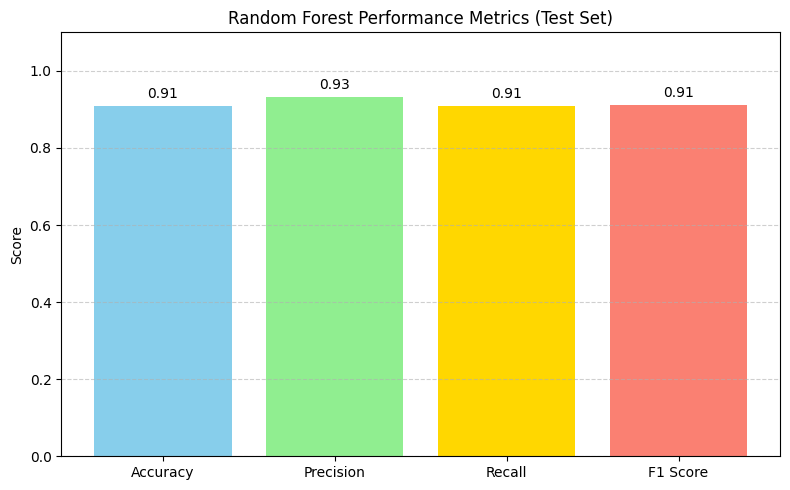

In [89]:

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 110, 120, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Train model
print("Training Random Forest with GridSearchCV...")
grid.fit(data_X_train, data_Y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict on test set
y_pred = best_model.predict(data_X_test)

# Test set metrics
acc = accuracy_score(data_Y_test, y_pred)
prec = precision_score(data_Y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(data_Y_test, y_pred, average='weighted')
f1 = f1_score(data_Y_test, y_pred, average='weighted')
cm = confusion_matrix(data_Y_test, y_pred)

print(f"\nTest Set Performance:")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print("Confusion Matrix:\n", cm)

# Cross-validated performance on training set
cv_results = cross_validate(
    best_model,
    data_X,
    data_Y,
    cv=5,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
)

# Mean scores from CV
acc_cv = np.mean(cv_results['test_accuracy'])
prec_cv = np.mean(cv_results['test_precision_weighted'])
rec_cv = np.mean(cv_results['test_recall_weighted'])
f1_cv = np.mean(cv_results['test_f1_weighted'])

print("\nCross-Validated Performance (on Training Set):")
print(f"CV Accuracy  : {acc_cv:.4f}")
print(f"CV Precision : {prec_cv:.4f}")
print(f"CV Recall    : {rec_cv:.4f}")
print(f"CV F1 Score  : {f1_cv:.4f}")

# Plot for test set metrics
metrics = [acc, prec, rec, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, metrics, color=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.ylim(0, 1.1)
plt.title('Random Forest Performance Metrics (Test Set)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


*kmediod on all parameters (random forest)*

In [90]:
data_X=pd.DataFrame(data_original.iloc[:,2:])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)
#data_X

Training Random Forest with GridSearchCV...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Test Set Performance:
Accuracy       : 0.9545
Precision      : 0.9610
Recall         : 0.9545
F1 Score       : 0.9556
Confusion Matrix:
 [[ 6  0]
 [ 1 15]]

Cross-Validated Performance (on Training Set):
CV Accuracy  : 0.8433
CV Precision : 0.8586
CV Recall    : 0.8433
CV F1 Score  : 0.8387


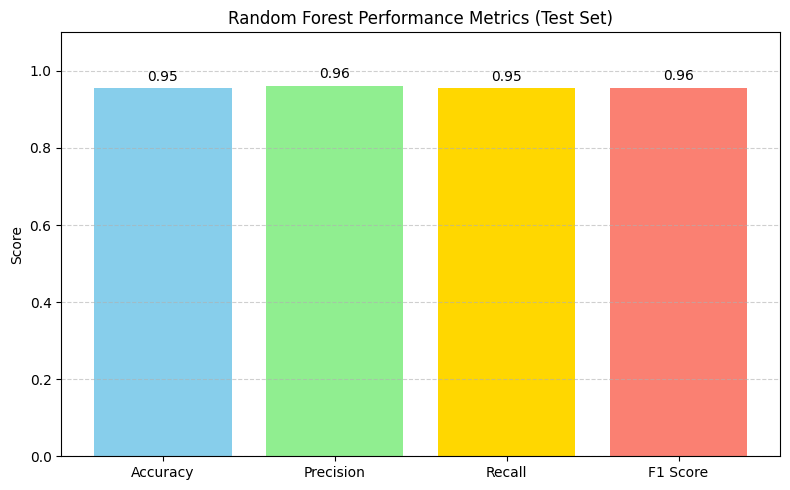

In [91]:

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 110, 120, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Train model
print("Training Random Forest with GridSearchCV...")
grid.fit(data_X_train, data_Y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict on test set
y_pred = best_model.predict(data_X_test)

# Test set metrics
acc = accuracy_score(data_Y_test, y_pred)
prec = precision_score(data_Y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(data_Y_test, y_pred, average='weighted')
f1 = f1_score(data_Y_test, y_pred, average='weighted')
cm = confusion_matrix(data_Y_test, y_pred)

print(f"\nTest Set Performance:")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print("Confusion Matrix:\n", cm)

# Cross-validated performance on training set
cv_results = cross_validate(
    best_model,
    data_X,
    data_Y,
    cv=5,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
)

# Mean scores from CV
acc_cv = np.mean(cv_results['test_accuracy'])
prec_cv = np.mean(cv_results['test_precision_weighted'])
rec_cv = np.mean(cv_results['test_recall_weighted'])
f1_cv = np.mean(cv_results['test_f1_weighted'])

print("\nCross-Validated Performance (on Training Set):")
print(f"CV Accuracy  : {acc_cv:.4f}")
print(f"CV Precision : {prec_cv:.4f}")
print(f"CV Recall    : {rec_cv:.4f}")
print(f"CV F1 Score  : {f1_cv:.4f}")

# Plot for test set metrics
metrics = [acc, prec, rec, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, metrics, color=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.ylim(0, 1.1)
plt.title('Random Forest Performance Metrics (Test Set)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


**SVM on kmediod(2)**

*only cgs as parameters svm(kmediod)*

In [28]:
data=pd.read_csv('3_one_hot_encoded.csv')
data_sub = data_original.iloc[:, 2:]
bool_cols = data_sub.select_dtypes(include='bool').columns
data_original[bool_cols] = data_original[bool_cols].astype(int)

data_X=pd.DataFrame(data_original.iloc[:,-8:])
#data_X

In [29]:
data_Y=pd.read_csv('labeled_clusters_KMedoids_k_2_sel.csv')
data_Y=pd.DataFrame(data_Y['Prod_Label_KMedoids_k=2_sel'])
#data_Y

In [30]:
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
Fold 1 - Accuracy: 0.5909, Precision: 0.6111, Recall: 0.8462, F1 Score: 0.7097
Fold 2 - Accuracy: 0.5909, Precision: 0.6250, Recall: 0.7692, F1 Score: 0.6897
Fold 3 - Accuracy: 0.5455, Precision: 0.6000, Recall: 0.6923, F1 Score: 0.6429
Fold 4 - Accuracy: 0.7143, Precision: 0.7333, Recall: 0.8462, F1 Score: 0.7857
Fold 5 - Accuracy: 0.4762, Precision: 0.5714, Recall: 0.6154, F1 Score: 0.5926
Average Accuracy       : 0.5835
Average Precision      : 0.6282
Average Recall         : 0.7538
Average F1 Score       : 0.6841

SVM with 'poly' kernel
Fold 1 - Best poly parameters: {'C': 1, 'degree': 2, 'gamma': 'scale'}
Fold 1 - Accuracy: 0.6364, Precision: 0.6923, Recall: 0.6923, F1 Score: 0.6923
Fold 2 - Best poly parameters: {'C': 1, 'degree': 2, 'gamma': 'scale'}
Fold 2 - Accuracy: 0.6364, Precision: 0.6471, Recall: 0.8462, F1 Score: 0.7333
Fold 3 - Best poly parameters: {'C': 1, 'degree': 2, 'gamma': 'scale'}
Fold 3 - Accuracy: 0.5455, Precision: 0.5882, Recall: 0.

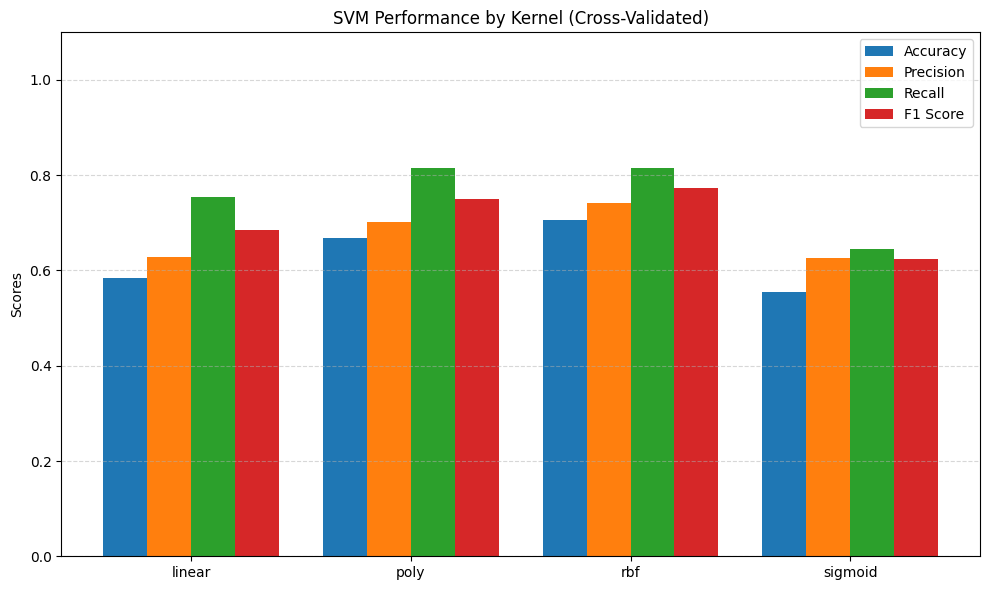

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')


kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        data_X_train, data_X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        data_Y_train, data_Y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        if kernel == 'poly':
            param_grid = {
                'degree': [2, 3, 4],
                'C': [0.1, 1, 10],
                'gamma': ['scale', 'auto']
            }
            grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
            grid.fit(data_X_train, data_Y_train)
            model = grid.best_estimator_
            print(f"Fold {fold_idx + 1} - Best poly parameters:", grid.best_params_)
        else:
            model = SVC(kernel=kernel)
            model.fit(data_X_train, data_Y_train)

        y_pred = model.predict(data_X_test)

        acc = accuracy_score(data_Y_test, y_pred)
        prec = precision_score(data_Y_test, y_pred)
        rec = recall_score(data_Y_test, y_pred)
        f1 = f1_score(data_Y_test, y_pred)

        acc_scores.append(acc)
        prec_scores.append(prec)
        rec_scores.append(rec)
        f1_scores.append(f1)

        print(f"Fold {fold_idx + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

    # Compute average metrics across folds
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    print(f"Average Accuracy       : {mean_acc:.4f}")
    print(f"Average Precision      : {mean_prec:.4f}")
    print(f"Average Recall         : {mean_rec:.4f}")
    print(f"Average F1 Score       : {mean_f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*svm using only output features*

In [15]:
data_Y
data_X=pd.DataFrame(data_original.iloc[:,2:-8])
data_X
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)

*svm using all the features kmediod*


SVM with 'linear' kernel
Fold 1 - Accuracy: 0.8636, Precision: 0.9167, Recall: 0.8462, F1 Score: 0.8800
Fold 2 - Accuracy: 0.8636, Precision: 0.8571, Recall: 0.9231, F1 Score: 0.8889
Fold 3 - Accuracy: 0.9091, Precision: 0.8667, Recall: 1.0000, F1 Score: 0.9286
Fold 4 - Accuracy: 0.9524, Precision: 1.0000, Recall: 0.9231, F1 Score: 0.9600
Fold 5 - Accuracy: 0.9524, Precision: 0.9286, Recall: 1.0000, F1 Score: 0.9630
Average Accuracy       : 0.9082
Average Precision      : 0.9138
Average Recall         : 0.9385
Average F1 Score       : 0.9241

SVM with 'poly' kernel
Poly Kernel - Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto'}
Fold 1 - Accuracy: 0.8636, Precision: 0.8125, Recall: 1.0000, F1 Score: 0.8966
Average Accuracy       : 0.8636
Average Precision      : 0.8125
Average Recall         : 1.0000
Average F1 Score       : 0.8966

SVM with 'rbf' kernel
Fold 1 - Accuracy: 0.5909, Precision: 0.6111, Recall: 0.8462, F1 Score: 0.7097
Fold 2 - Accuracy: 0.7727, Precision: 0.7222, 

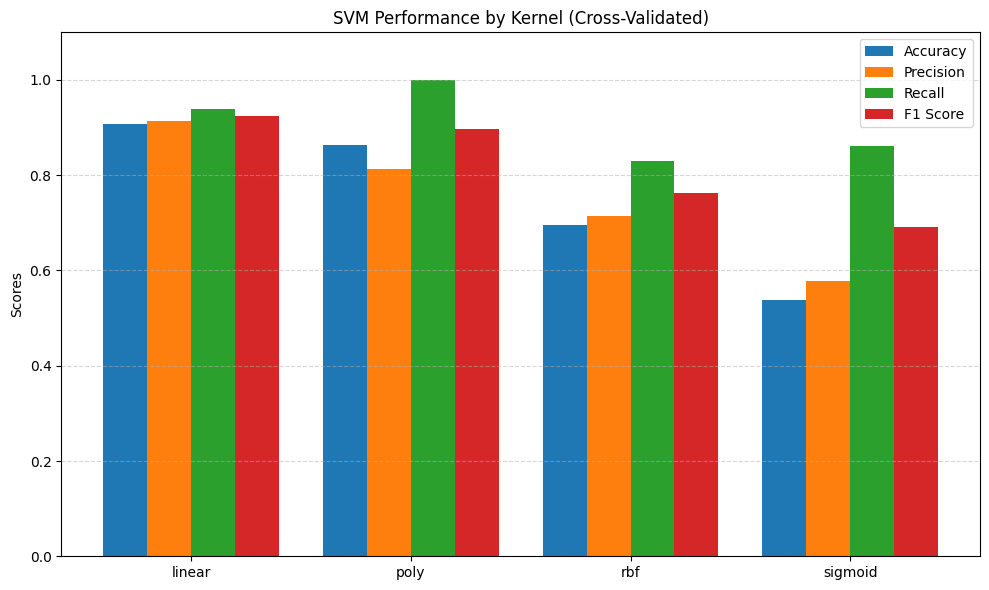

In [16]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        data_X_train, data_X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        data_Y_train, data_Y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        if kernel == 'poly':
            # Run only for one fold for the 'poly' kernel
            param_grid = {
                'degree': [2,],
                'C': [0.1,],
                'gamma': ['auto']
            }
            grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
            grid.fit(data_X_train, data_Y_train)
            model = grid.best_estimator_
            print(f"Poly Kernel - Best parameters: {grid.best_params_}")

            y_pred = model.predict(data_X_test)

            acc = accuracy_score(data_Y_test, y_pred)
            prec = precision_score(data_Y_test, y_pred)
            rec = recall_score(data_Y_test, y_pred)
            f1 = f1_score(data_Y_test, y_pred)

            # Store the result for 'poly' kernel (only one fold)
            acc_scores.append(acc)
            prec_scores.append(prec)
            rec_scores.append(rec)
            f1_scores.append(f1)

            print(f"Fold {fold_idx + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
            break  # Stop after one fold for 'poly' kernel
        else:
            model = SVC(kernel=kernel)
            model.fit(data_X_train, data_Y_train)

        y_pred = model.predict(data_X_test)

        acc = accuracy_score(data_Y_test, y_pred)
        prec = precision_score(data_Y_test, y_pred)
        rec = recall_score(data_Y_test, y_pred)
        f1 = f1_score(data_Y_test, y_pred)

        acc_scores.append(acc)
        prec_scores.append(prec)
        rec_scores.append(rec)
        f1_scores.append(f1)

        print(f"Fold {fold_idx + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

    # Compute average metrics across folds for all kernels
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    print(f"Average Accuracy       : {mean_acc:.4f}")
    print(f"Average Precision      : {mean_prec:.4f}")
    print(f"Average Recall         : {mean_rec:.4f}")
    print(f"Average F1 Score       : {mean_f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


"svm for kmediod(2) for all param"

In [41]:
data_Y
data_X=pd.DataFrame(data_original.iloc[:,2:])
data_X
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)
#data_X_train


SVM with 'linear' kernel
Fold 1 - Accuracy: 0.8636, Precision: 0.8333, Recall: 0.7143, F1 Score: 0.7692
Fold 2 - Accuracy: 0.9545, Precision: 1.0000, Recall: 0.8571, F1 Score: 0.9231
Fold 3 - Accuracy: 0.9091, Precision: 0.8750, Recall: 0.8750, F1 Score: 0.8750
Fold 4 - Accuracy: 0.9524, Precision: 1.0000, Recall: 0.8571, F1 Score: 0.9231
Fold 5 - Accuracy: 0.9524, Precision: 1.0000, Recall: 0.8571, F1 Score: 0.9231
Average Accuracy       : 0.9264
Average Precision      : 0.9417
Average Recall         : 0.8321
Average F1 Score       : 0.8827

SVM with 'poly' kernel
Poly Kernel - Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto'}
Fold 1 - Accuracy: 0.9091, Precision: 0.7778, Recall: 1.0000, F1 Score: 0.8750
Average Accuracy       : 0.9091
Average Precision      : 0.7778
Average Recall         : 1.0000
Average F1 Score       : 0.8750

SVM with 'rbf' kernel
Fold 1 - Accuracy: 0.7273, Precision: 0.6000, Recall: 0.4286, F1 Score: 0.5000
Fold 2 - Accuracy: 0.8636, Precision: 1.0000, 

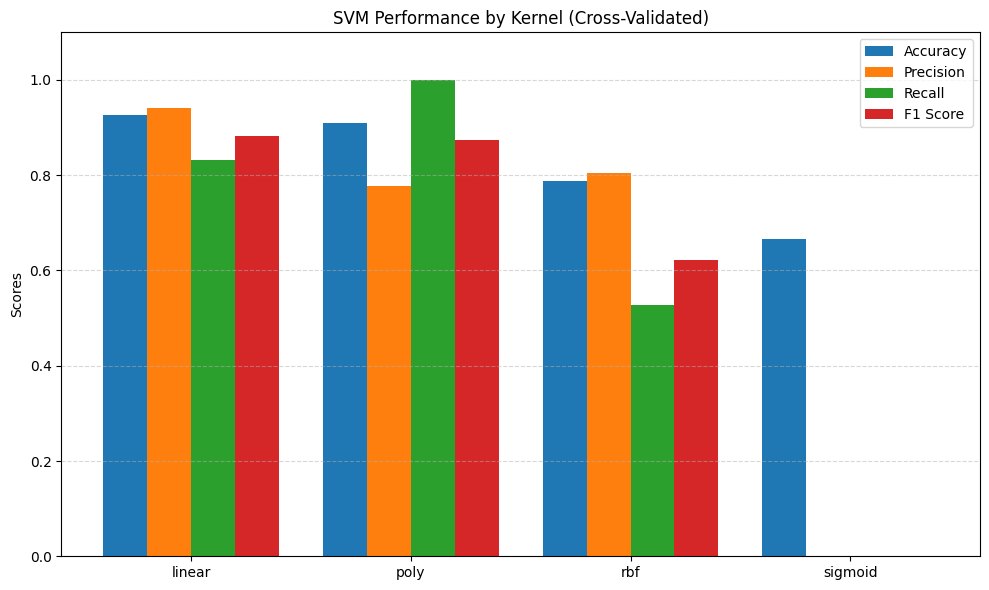

In [42]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        data_X_train, data_X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        data_Y_train, data_Y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        if kernel == 'poly':
            # Run only for one fold for the 'poly' kernel
            param_grid = {
                'degree': [2,],
                'C': [0.1,],
                'gamma': ['auto']
            }
            grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
            grid.fit(data_X_train, data_Y_train)
            model = grid.best_estimator_
            print(f"Poly Kernel - Best parameters: {grid.best_params_}")

            y_pred = model.predict(data_X_test)

            acc = accuracy_score(data_Y_test, y_pred)
            prec = precision_score(data_Y_test, y_pred)
            rec = recall_score(data_Y_test, y_pred)
            f1 = f1_score(data_Y_test, y_pred)

            # Store the result for 'poly' kernel (only one fold)
            acc_scores.append(acc)
            prec_scores.append(prec)
            rec_scores.append(rec)
            f1_scores.append(f1)

            print(f"Fold {fold_idx + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
            break  # Stop after one fold for 'poly' kernel
        else:
            model = SVC(kernel=kernel)
            model.fit(data_X_train, data_Y_train)

        y_pred = model.predict(data_X_test)

        acc = accuracy_score(data_Y_test, y_pred)
        prec = precision_score(data_Y_test, y_pred)
        rec = recall_score(data_Y_test, y_pred)
        f1 = f1_score(data_Y_test, y_pred)

        acc_scores.append(acc)
        prec_scores.append(prec)
        rec_scores.append(rec)
        f1_scores.append(f1)

        print(f"Fold {fold_idx + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

    # Compute average metrics across folds for all kernels
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    print(f"Average Accuracy       : {mean_acc:.4f}")
    print(f"Average Precision      : {mean_prec:.4f}")
    print(f"Average Recall         : {mean_rec:.4f}")
    print(f"Average F1 Score       : {mean_f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**SVM on kmeans(2)**

*svm on input parameters (kmean2)*

In [32]:
data_Y.head()

,Prod_Label_KMedoids_k=2_sel
0,0
1,1
2,0
3,1
4,1


In [35]:
data_Y=pd.read_csv("labeled_clusters_KMeans_k_2_sel.csv")
data_Y=pd.DataFrame(data_Y['Prod_Label_KMeans_k=2_sel'])
data_X=pd.DataFrame(data_original.iloc[:,-8:])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
Fold 1 - Accuracy: 0.6818, Precision: 0.5000, Recall: 0.1429, F1 Score: 0.2222
Fold 2 - Accuracy: 0.6818, Precision: 0.5000, Recall: 0.1429, F1 Score: 0.2222
Fold 3 - Accuracy: 0.6364, Precision: 0.5000, Recall: 0.5000, F1 Score: 0.5000
Fold 4 - Accuracy: 0.6190, Precision: 0.4444, Recall: 0.5714, F1 Score: 0.5000
Fold 5 - Accuracy: 0.6667, Precision: 0.5000, Recall: 0.2857, F1 Score: 0.3636
Average Accuracy       : 0.6571
Average Precision      : 0.4889
Average Recall         : 0.3286
Average F1 Score       : 0.3616

SVM with 'poly' kernel
Fold 1 - Best poly parameters: {'C': 10, 'degree': 2, 'gamma': 'scale'}
Fold 1 - Accuracy: 0.9091, Precision: 0.7778, Recall: 1.0000, F1 Score: 0.8750
Fold 2 - Best poly parameters: {'C': 10, 'degree': 2, 'gamma': 'scale'}
Fold 2 - Accuracy: 0.8636, Precision: 0.8333, Recall: 0.7143, F1 Score: 0.7692
Fold 3 - Best poly parameters: {'C': 10, 'degree': 3, 'gamma': 'scale'}
Fold 3 - Accuracy: 0.8636, Precision: 0.7778, Recall:

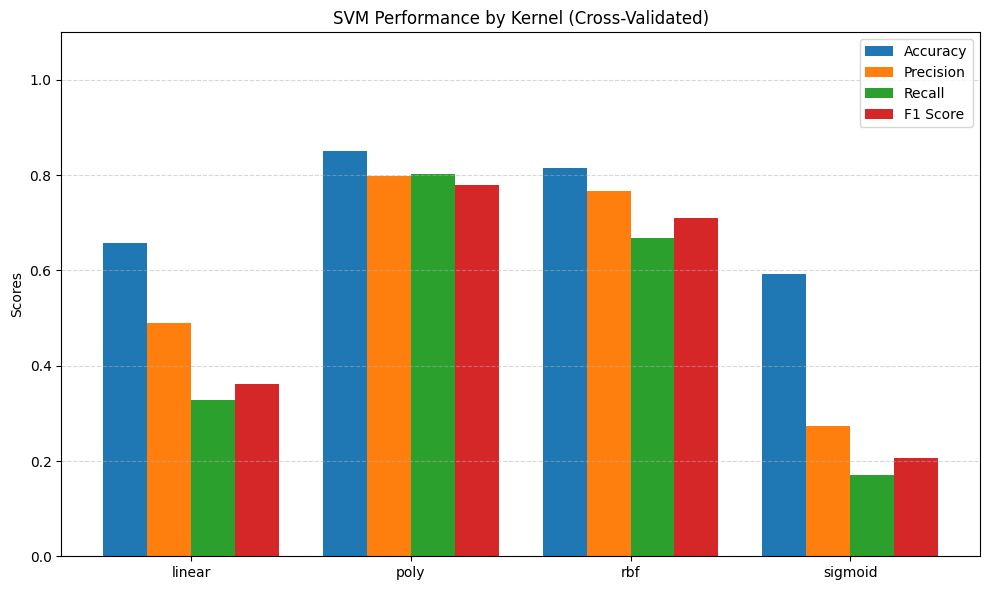

In [36]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        data_X_train, data_X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        data_Y_train, data_Y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        if kernel == 'poly':
            param_grid = {
                'degree': [2, 3, 4],
                'C': [0.1, 1, 10],
                'gamma': ['scale', 'auto']
            }
            grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
            grid.fit(data_X_train, data_Y_train)
            model = grid.best_estimator_
            print(f"Fold {fold_idx + 1} - Best poly parameters:", grid.best_params_)
        else:
            model = SVC(kernel=kernel)
            model.fit(data_X_train, data_Y_train)

        y_pred = model.predict(data_X_test)

        acc = accuracy_score(data_Y_test, y_pred)
        prec = precision_score(data_Y_test, y_pred)
        rec = recall_score(data_Y_test, y_pred)
        f1 = f1_score(data_Y_test, y_pred)

        acc_scores.append(acc)
        prec_scores.append(prec)
        rec_scores.append(rec)
        f1_scores.append(f1)

        print(f"Fold {fold_idx + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

    # Compute average metrics across folds
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    print(f"Average Accuracy       : {mean_acc:.4f}")
    print(f"Average Precision      : {mean_prec:.4f}")
    print(f"Average Recall         : {mean_rec:.4f}")
    print(f"Average F1 Score       : {mean_f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*svm on output parameters (kmean2)*

In [37]:
data_X=pd.DataFrame(data_original.iloc[:,2:-8])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
Fold 1 - Accuracy: 0.9545, Precision: 0.8750, Recall: 1.0000, F1 Score: 0.9333
Fold 2 - Accuracy: 0.9545, Precision: 1.0000, Recall: 0.8571, F1 Score: 0.9231
Fold 3 - Accuracy: 0.9091, Precision: 0.8000, Recall: 1.0000, F1 Score: 0.8889
Fold 4 - Accuracy: 0.8571, Precision: 0.7500, Recall: 0.8571, F1 Score: 0.8000
Fold 5 - Accuracy: 0.9524, Precision: 1.0000, Recall: 0.8571, F1 Score: 0.9231
Average Accuracy       : 0.9255
Average Precision      : 0.8850
Average Recall         : 0.9143
Average F1 Score       : 0.8937

SVM with 'poly' kernel
Poly Kernel - Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto'}
Fold 1 - Accuracy: 0.9091, Precision: 0.7778, Recall: 1.0000, F1 Score: 0.8750
Average Accuracy       : 0.9091
Average Precision      : 0.7778
Average Recall         : 1.0000
Average F1 Score       : 0.8750

SVM with 'rbf' kernel
Fold 1 - Accuracy: 0.7273, Precision: 0.6000, Recall: 0.4286, F1 Score: 0.5000
Fold 2 - Accuracy: 0.8636, Precision: 1.0000, 

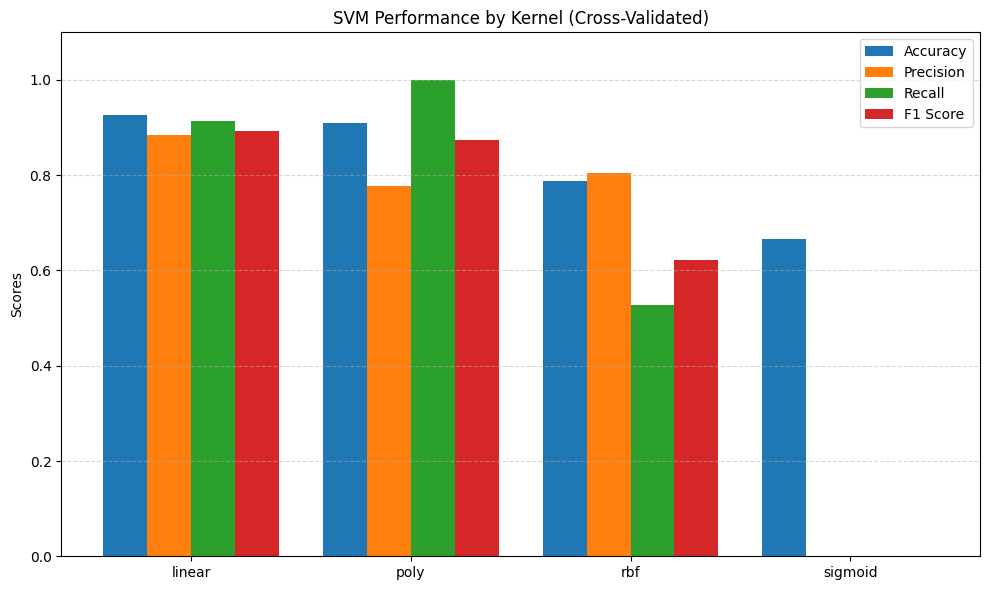

In [38]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        data_X_train, data_X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        data_Y_train, data_Y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        if kernel == 'poly':
            # Run only for one fold for the 'poly' kernel
            param_grid = {
                'degree': [2,],
                'C': [0.1,],
                'gamma': ['auto']
            }
            grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
            grid.fit(data_X_train, data_Y_train)
            model = grid.best_estimator_
            print(f"Poly Kernel - Best parameters: {grid.best_params_}")

            y_pred = model.predict(data_X_test)

            acc = accuracy_score(data_Y_test, y_pred)
            prec = precision_score(data_Y_test, y_pred)
            rec = recall_score(data_Y_test, y_pred)
            f1 = f1_score(data_Y_test, y_pred)

            # Store the result for 'poly' kernel (only one fold)
            acc_scores.append(acc)
            prec_scores.append(prec)
            rec_scores.append(rec)
            f1_scores.append(f1)

            print(f"Fold {fold_idx + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
            break  # Stop after one fold for 'poly' kernel
        else:
            model = SVC(kernel=kernel)
            model.fit(data_X_train, data_Y_train)

        y_pred = model.predict(data_X_test)

        acc = accuracy_score(data_Y_test, y_pred)
        prec = precision_score(data_Y_test, y_pred)
        rec = recall_score(data_Y_test, y_pred)
        f1 = f1_score(data_Y_test, y_pred)

        acc_scores.append(acc)
        prec_scores.append(prec)
        rec_scores.append(rec)
        f1_scores.append(f1)

        print(f"Fold {fold_idx + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

    # Compute average metrics across folds for all kernels
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    print(f"Average Accuracy       : {mean_acc:.4f}")
    print(f"Average Precision      : {mean_prec:.4f}")
    print(f"Average Recall         : {mean_rec:.4f}")
    print(f"Average F1 Score       : {mean_f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*svm on all parameters kmeans(2)*

In [39]:
data_X=pd.DataFrame(data_original.iloc[:,2:])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
Fold 1 - Accuracy: 0.8636, Precision: 0.8333, Recall: 0.7143, F1 Score: 0.7692
Fold 2 - Accuracy: 0.9545, Precision: 1.0000, Recall: 0.8571, F1 Score: 0.9231
Fold 3 - Accuracy: 0.9091, Precision: 0.8750, Recall: 0.8750, F1 Score: 0.8750
Fold 4 - Accuracy: 0.9524, Precision: 1.0000, Recall: 0.8571, F1 Score: 0.9231
Fold 5 - Accuracy: 0.9524, Precision: 1.0000, Recall: 0.8571, F1 Score: 0.9231
Average Accuracy       : 0.9264
Average Precision      : 0.9417
Average Recall         : 0.8321
Average F1 Score       : 0.8827

SVM with 'poly' kernel
Poly Kernel - Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto'}
Fold 1 - Accuracy: 0.9091, Precision: 0.7778, Recall: 1.0000, F1 Score: 0.8750
Average Accuracy       : 0.9091
Average Precision      : 0.7778
Average Recall         : 1.0000
Average F1 Score       : 0.8750

SVM with 'rbf' kernel
Fold 1 - Accuracy: 0.7273, Precision: 0.6000, Recall: 0.4286, F1 Score: 0.5000
Fold 2 - Accuracy: 0.8636, Precision: 1.0000, 

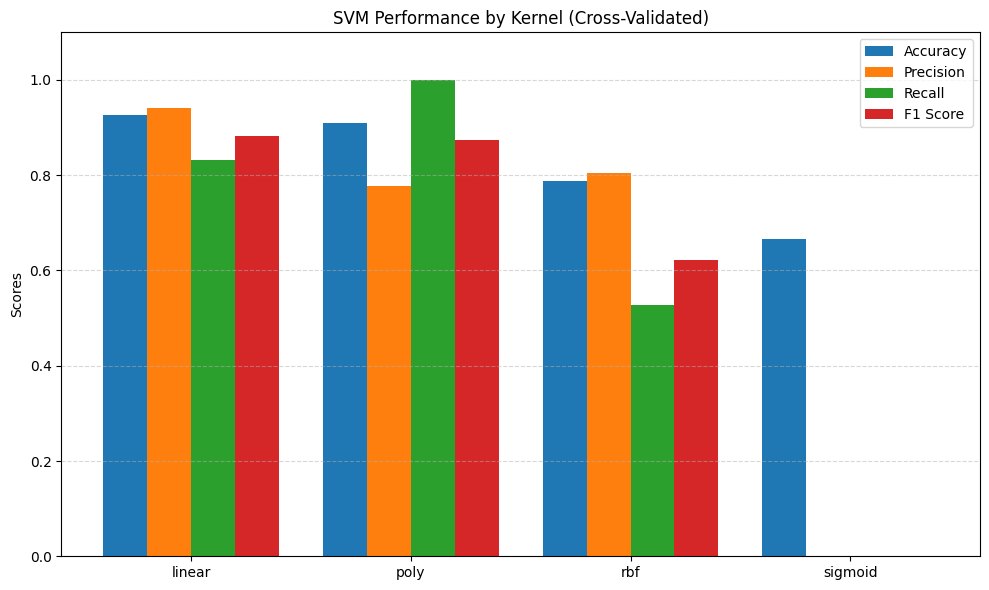

In [40]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        data_X_train, data_X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        data_Y_train, data_Y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        if kernel == 'poly':
            # Run only for one fold for the 'poly' kernel
            param_grid = {
                'degree': [2,],
                'C': [0.1,],
                'gamma': ['auto']
            }
            grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
            grid.fit(data_X_train, data_Y_train)
            model = grid.best_estimator_
            print(f"Poly Kernel - Best parameters: {grid.best_params_}")

            y_pred = model.predict(data_X_test)

            acc = accuracy_score(data_Y_test, y_pred)
            prec = precision_score(data_Y_test, y_pred)
            rec = recall_score(data_Y_test, y_pred)
            f1 = f1_score(data_Y_test, y_pred)

            # Store the result for 'poly' kernel (only one fold)
            acc_scores.append(acc)
            prec_scores.append(prec)
            rec_scores.append(rec)
            f1_scores.append(f1)

            print(f"Fold {fold_idx + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
            break  # Stop after one fold for 'poly' kernel
        else:
            model = SVC(kernel=kernel)
            model.fit(data_X_train, data_Y_train)

        y_pred = model.predict(data_X_test)

        acc = accuracy_score(data_Y_test, y_pred)
        prec = precision_score(data_Y_test, y_pred)
        rec = recall_score(data_Y_test, y_pred)
        f1 = f1_score(data_Y_test, y_pred)

        acc_scores.append(acc)
        prec_scores.append(prec)
        rec_scores.append(rec)
        f1_scores.append(f1)

        print(f"Fold {fold_idx + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

    # Compute average metrics across folds for all kernels
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    print(f"Average Accuracy       : {mean_acc:.4f}")
    print(f"Average Precision      : {mean_prec:.4f}")
    print(f"Average Recall         : {mean_rec:.4f}")
    print(f"Average F1 Score       : {mean_f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Neural networks**

**On Kmediod clusters**

*input parameters(cgs) kmediod*

In [13]:
data=pd.read_csv('3_one_hot_encoded.csv')
data_sub = data_original.iloc[:, 2:]
bool_cols = data_sub.select_dtypes(include='bool').columns
data_original[bool_cols] = data_original[bool_cols].astype(int)

data_X=pd.DataFrame(data_original.iloc[:,-8:])
data_Y=pd.read_csv('labeled_clusters_KMedoids_k_2_sel.csv')
data_Y=pd.DataFrame(data_Y['Prod_Label_KMedoids_k=2_sel'])


Training Neural Network with activation = 'identity'
Average CV Scores for activation = 'identity':
  Accuracy : 0.6576
  Precision: 0.6550
  Recall   : 0.6576
  F1 Score : 0.6510

Training Neural Network with activation = 'logistic'
Average CV Scores for activation = 'logistic':
  Accuracy : 0.6117
  Precision: 0.5998
  Recall   : 0.6117
  F1 Score : 0.5892

Training Neural Network with activation = 'tanh'
Average CV Scores for activation = 'tanh':
  Accuracy : 0.6390
  Precision: 0.6361
  Recall   : 0.6390
  F1 Score : 0.6341

Training Neural Network with activation = 'relu'
Average CV Scores for activation = 'relu':
  Accuracy : 0.6584
  Precision: 0.6595
  Recall   : 0.6584
  F1 Score : 0.6540


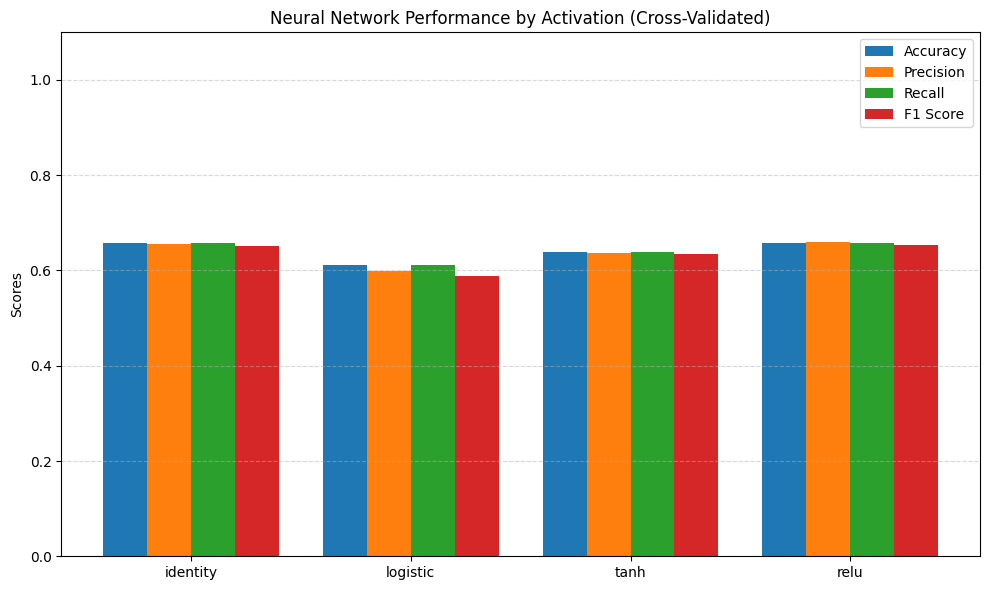

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')


activations = ['identity', 'logistic', 'tanh', 'relu']

# Initialize dictionary to store results
results = {
    'Activation': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over activation functions
for activation in activations:
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    print(f"\nTraining Neural Network with activation = '{activation}'")

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        X_train, X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        y_train, y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        # One hidden layer, 100 neurons (default), change if needed
        model = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        rec_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average scores
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Activation'].append(activation)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    # Print average metrics
    print(f"Average CV Scores for activation = '{activation}':")
    print(f"  Accuracy : {mean_acc:.4f}")
    print(f"  Precision: {mean_prec:.4f}")
    print(f"  Recall   : {mean_rec:.4f}")
    print(f"  F1 Score : {mean_f1:.4f}")

# Optional: Bar plot of final average scores
x = np.arange(len(activations))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Neural Network Performance by Activation (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Activation'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*output parameters kmediod (nn)*

In [15]:

data_X=pd.DataFrame(data_original.iloc[:,2:-8])
#data_Y


Training Neural Network with activation = 'identity'
Average CV Scores for activation = 'identity':
  Accuracy : 0.6022
  Precision: 0.3628
  Recall   : 0.6022
  F1 Score : 0.4527

Training Neural Network with activation = 'logistic'
Average CV Scores for activation = 'logistic':
  Accuracy : 0.6749
  Precision: 0.5858
  Recall   : 0.6749
  F1 Score : 0.6066

Training Neural Network with activation = 'tanh'
Average CV Scores for activation = 'tanh':
  Accuracy : 0.6022
  Precision: 0.3628
  Recall   : 0.6022
  F1 Score : 0.4527

Training Neural Network with activation = 'relu'
Average CV Scores for activation = 'relu':
  Accuracy : 0.6022
  Precision: 0.3628
  Recall   : 0.6022
  F1 Score : 0.4527


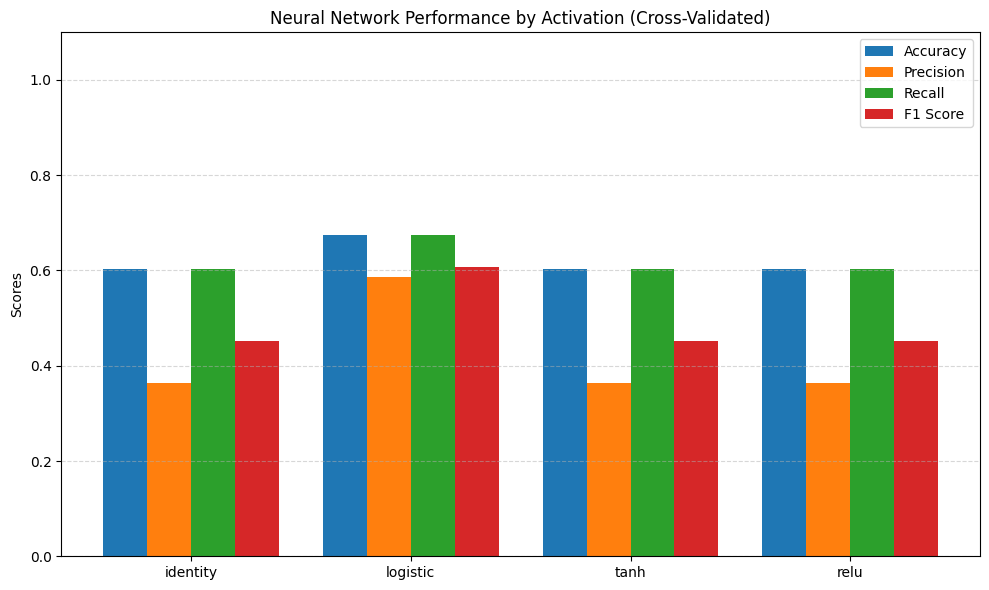

In [16]:

activations = ['identity', 'logistic', 'tanh', 'relu']

# Initialize dictionary to store results
results = {
    'Activation': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over activation functions
for activation in activations:
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    print(f"\nTraining Neural Network with activation = '{activation}'")

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        X_train, X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        y_train, y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        # One hidden layer, 100 neurons (default), change if needed
        model = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        rec_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average scores
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Activation'].append(activation)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    # Print average metrics
    print(f"Average CV Scores for activation = '{activation}':")
    print(f"  Accuracy : {mean_acc:.4f}")
    print(f"  Precision: {mean_prec:.4f}")
    print(f"  Recall   : {mean_rec:.4f}")
    print(f"  F1 Score : {mean_f1:.4f}")

# Optional: Bar plot of final average scores
x = np.arange(len(activations))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Neural Network Performance by Activation (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Activation'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*all features kmediod (NN)*

In [17]:
data_X=pd.DataFrame(data_original.iloc[:,2:])
#data_Y


Training Neural Network with activation = 'identity'
Average CV Scores for activation = 'identity':
  Accuracy : 0.5390
  Precision: 0.5702
  Recall   : 0.5390
  F1 Score : 0.4214

Training Neural Network with activation = 'logistic'
Average CV Scores for activation = 'logistic':
  Accuracy : 0.7216
  Precision: 0.6889
  Recall   : 0.7216
  F1 Score : 0.6858

Training Neural Network with activation = 'tanh'
Average CV Scores for activation = 'tanh':
  Accuracy : 0.6022
  Precision: 0.3628
  Recall   : 0.6022
  F1 Score : 0.4527

Training Neural Network with activation = 'relu'
Average CV Scores for activation = 'relu':
  Accuracy : 0.6022
  Precision: 0.3628
  Recall   : 0.6022
  F1 Score : 0.4527


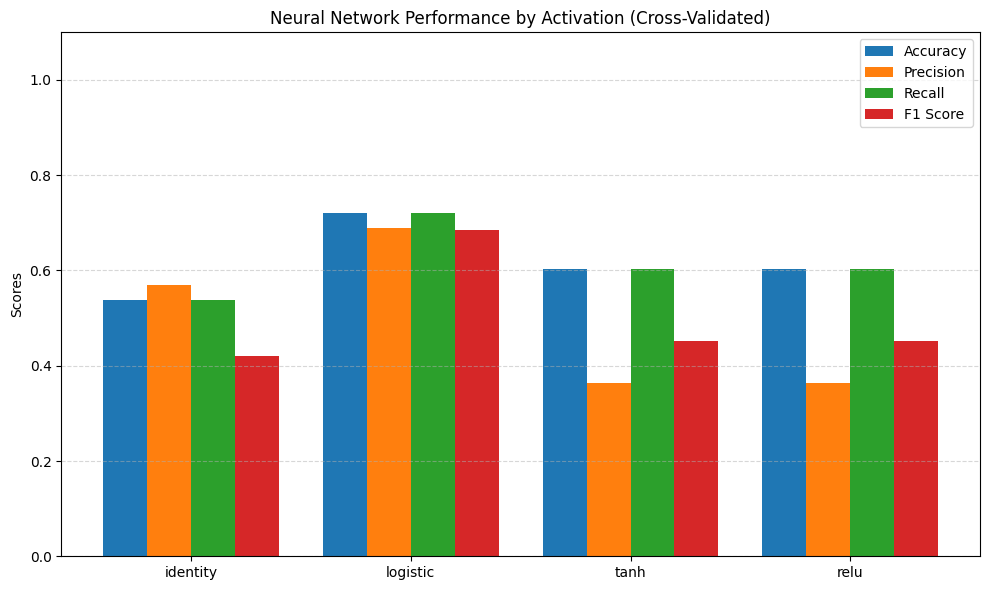

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

activations = ['identity', 'logistic', 'tanh', 'relu']

# Initialize dictionary to store results
results = {
    'Activation': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over activation functions
for activation in activations:
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    print(f"\nTraining Neural Network with activation = '{activation}'")

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        X_train, X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        y_train, y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        # One hidden layer, 100 neurons (default), change if needed
        model = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        rec_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average scores
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Activation'].append(activation)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    # Print average metrics
    print(f"Average CV Scores for activation = '{activation}':")
    print(f"  Accuracy : {mean_acc:.4f}")
    print(f"  Precision: {mean_prec:.4f}")
    print(f"  Recall   : {mean_rec:.4f}")
    print(f"  F1 Score : {mean_f1:.4f}")

# Optional: Bar plot of final average scores
x = np.arange(len(activations))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Neural Network Performance by Activation (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Activation'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**for kmean clusters**

*only input param(cgs) kmean (nn) *

In [19]:
data_Y=pd.read_csv("labeled_clusters_KMeans_k_2_sel.csv")
data_Y=pd.DataFrame(data_Y['Prod_Label_KMeans_k=2_sel'])
data_X=pd.DataFrame(data_original.iloc[:,-8:])
#data_X

,C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
103,0,1,0,0,1,0,0,0
104,0,0,1,1,0,0,0,0
105,1,0,0,0,0,0,1,0
106,1,1,0,0,0,1,0,0



Training Neural Network with activation = 'identity'
Average CV Scores for activation = 'identity':
  Accuracy : 0.6563
  Precision: 0.6322
  Recall   : 0.6563
  F1 Score : 0.6280

Training Neural Network with activation = 'logistic'
Average CV Scores for activation = 'logistic':
  Accuracy : 0.6840
  Precision: 0.6660
  Recall   : 0.6840
  F1 Score : 0.6633

Training Neural Network with activation = 'tanh'
Average CV Scores for activation = 'tanh':
  Accuracy : 0.6848
  Precision: 0.6696
  Recall   : 0.6848
  F1 Score : 0.6579

Training Neural Network with activation = 'relu'
Average CV Scores for activation = 'relu':
  Accuracy : 0.8424
  Precision: 0.8546
  Recall   : 0.8424
  F1 Score : 0.8425


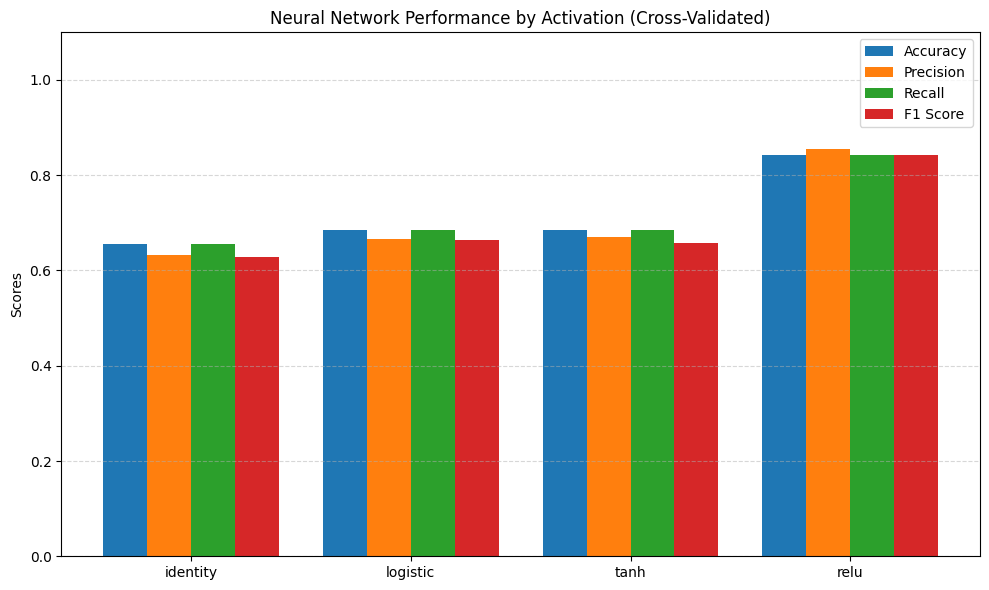

In [20]:
activations = ['identity', 'logistic', 'tanh', 'relu']

# Initialize dictionary to store results
results = {
    'Activation': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over activation functions
for activation in activations:
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    print(f"\nTraining Neural Network with activation = '{activation}'")

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        X_train, X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        y_train, y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        # One hidden layer, 100 neurons (default), change if needed
        model = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        rec_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average scores
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Activation'].append(activation)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    # Print average metrics
    print(f"Average CV Scores for activation = '{activation}':")
    print(f"  Accuracy : {mean_acc:.4f}")
    print(f"  Precision: {mean_prec:.4f}")
    print(f"  Recall   : {mean_rec:.4f}")
    print(f"  F1 Score : {mean_f1:.4f}")

# Optional: Bar plot of final average scores
x = np.arange(len(activations))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Neural Network Performance by Activation (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Activation'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*nn on kmean(2) for output param*

In [21]:
data_X=pd.DataFrame(data_original.iloc[:,2:-8])


Training Neural Network with activation = 'identity'
Average CV Scores for activation = 'identity':
  Accuracy : 0.3333
  Precision: 0.1114
  Recall   : 0.3333
  F1 Score : 0.1669

Training Neural Network with activation = 'logistic'
Average CV Scores for activation = 'logistic':
  Accuracy : 0.8424
  Precision: 0.8504
  Recall   : 0.8424
  F1 Score : 0.8399

Training Neural Network with activation = 'tanh'
Average CV Scores for activation = 'tanh':
  Accuracy : 0.6667
  Precision: 0.4447
  Recall   : 0.6667
  F1 Score : 0.5335

Training Neural Network with activation = 'relu'
Average CV Scores for activation = 'relu':
  Accuracy : 0.6571
  Precision: 0.6789
  Recall   : 0.6571
  F1 Score : 0.6229


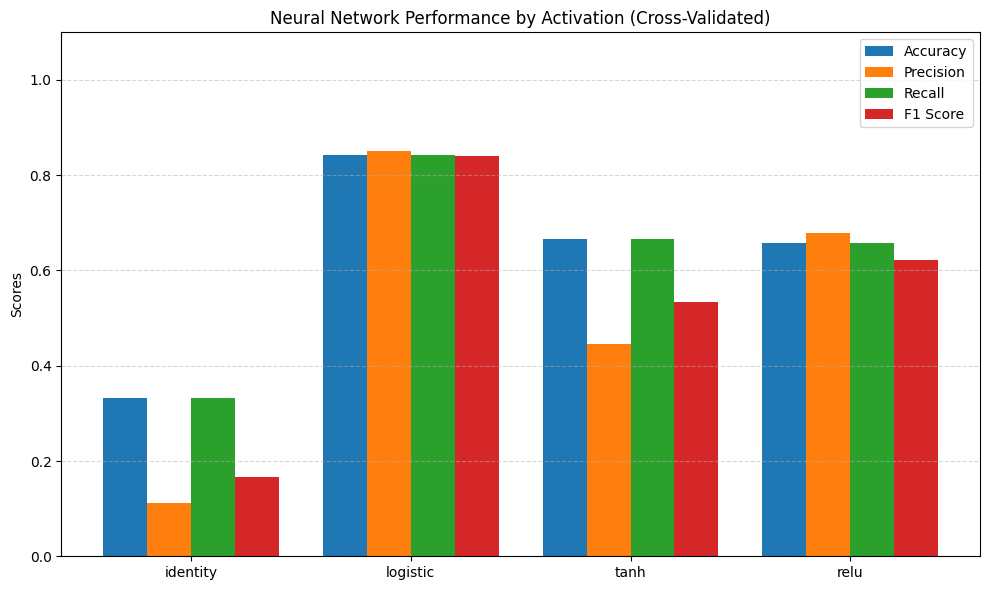

In [22]:
activations = ['identity', 'logistic', 'tanh', 'relu']

# Initialize dictionary to store results
results = {
    'Activation': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over activation functions
for activation in activations:
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    print(f"\nTraining Neural Network with activation = '{activation}'")

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        X_train, X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        y_train, y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        # One hidden layer, 100 neurons (default), change if needed
        model = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        rec_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average scores
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Activation'].append(activation)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    # Print average metrics
    print(f"Average CV Scores for activation = '{activation}':")
    print(f"  Accuracy : {mean_acc:.4f}")
    print(f"  Precision: {mean_prec:.4f}")
    print(f"  Recall   : {mean_rec:.4f}")
    print(f"  F1 Score : {mean_f1:.4f}")

# Optional: Bar plot of final average scores
x = np.arange(len(activations))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Neural Network Performance by Activation (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Activation'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*nn on kmean(2) for all param*

In [23]:
data_X=pd.DataFrame(data_original.iloc[:,2:])


Training Neural Network with activation = 'identity'
Average CV Scores for activation = 'identity':
  Accuracy : 0.6212
  Precision: 0.5064
  Recall   : 0.6212
  F1 Score : 0.5354

Training Neural Network with activation = 'logistic'
Average CV Scores for activation = 'logistic':
  Accuracy : 0.8242
  Precision: 0.7849
  Recall   : 0.8242
  F1 Score : 0.7981

Training Neural Network with activation = 'tanh'
Average CV Scores for activation = 'tanh':
  Accuracy : 0.6667
  Precision: 0.4447
  Recall   : 0.6667
  F1 Score : 0.5335

Training Neural Network with activation = 'relu'
Average CV Scores for activation = 'relu':
  Accuracy : 0.5104
  Precision: 0.3893
  Recall   : 0.5104
  F1 Score : 0.4065


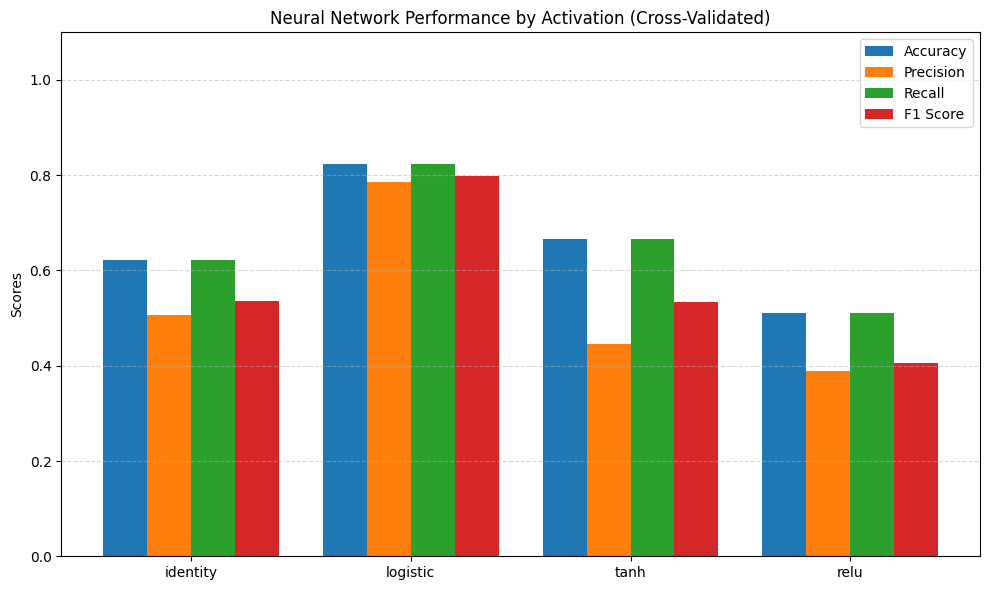

In [24]:
activations = ['identity', 'logistic', 'tanh', 'relu']

# Initialize dictionary to store results
results = {
    'Activation': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over activation functions
for activation in activations:
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    print(f"\nTraining Neural Network with activation = '{activation}'")

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data_X, data_Y)):
        # Use .iloc to index by row numbers for DataFrame
        X_train, X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
        y_train, y_test = data_Y.iloc[train_idx], data_Y.iloc[test_idx]

        # One hidden layer, 100 neurons (default), change if needed
        model = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        rec_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average scores
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    results['Activation'].append(activation)
    results['Accuracy'].append(mean_acc)
    results['Precision'].append(mean_prec)
    results['Recall'].append(mean_rec)
    results['F1 Score'].append(mean_f1)

    # Print average metrics
    print(f"Average CV Scores for activation = '{activation}':")
    print(f"  Accuracy : {mean_acc:.4f}")
    print(f"  Precision: {mean_prec:.4f}")
    print(f"  Recall   : {mean_rec:.4f}")
    print(f"  F1 Score : {mean_f1:.4f}")

# Optional: Bar plot of final average scores
x = np.arange(len(activations))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Neural Network Performance by Activation (Cross-Validated)')
ax.set_xticks(x)
ax.set_xticklabels(results['Activation'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
